In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import os.path as p

import aronnax as aro

## Pretty plots
plt.rcParams['figure.figsize'] = (12, 12) # set default figure size to 12x12 inches
plt.rc('text',usetex=True)
#font = {'family':'serif','size':16}
font = {'family':'serif','size':16, 'serif': ['computer modern roman']}
# font = {'size':16, 'serif': ['computer modern roman']}
plt.rc('font',**font)
plt.rc('legend',**{'fontsize':14})
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']


In [2]:
k = np.array([0, 10, 50, 100, 200, 300, 500, 1000])
u = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16])

In [3]:
folder_list = []

base_dir = '/Users/doddridge/Desktop/ice-ocean-governor/'

for vel in u:
    for visc in k:
        foldername = '{0}u{1}k{2}'.format(base_dir, vel,visc)
        folder_list.append(foldername)
        

In [4]:
ds = pd.DataFrame(index=np.arange(40000)*864+1)
# ds = pd.DataFrame()

for folder in folder_list[::1]:
    try:
        single_sim = pd.read_csv('{0}/spin_up/output/diagnostic.h.csv'.format(folder), index_col=0)
#         single_sim['{0}'.format(folder)] = single_sim['max01            '] - single_sim['min01            ']
        if folder!='u0k0':
            single_sim.drop_duplicates(inplace=True)

        ds['{0}'.format(p.basename(folder))] = single_sim['max01            '] - single_sim['min01            ']
#         ds = pd.concat(ds, single_sim['{0}'.format(folder)])
    except:
        pass
#         print(folder, 'failed')

ds['u0k0'] = 0

ds.head()

,u0k0,u2k0,u2k10,u4k0,u6k0,u8k0,u8k10,u8k50,u8k100,u8k300,...,u10k0,u12k0,u14k0,u16k0,u16k10,u16k50,u16k100,u16k200,u16k500,u16k1000
1,0,2.161102e-08,2.161102e-08,8.643997e-08,1.944790e-07,3.457200e-07,3.457200e-07,3.457200e-07,3.457190e-07,3.457190e-07,...,5.401570e-07,7.777821e-07,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
865,0,1.593436e-02,1.593374e-02,6.364045e-02,1.429685e-01,2.537640e-01,2.537543e-01,2.537151e-01,2.536662e-01,2.534709e-01,...,3.958674e-01,5.691130e-01,0.773331,1.008357,1.008319,1.008165,1.007973,1.007590,1.006441,1.004532
1729,0,3.218916e-02,3.218661e-02,1.282519e-01,2.874387e-01,5.090002e-01,5.089607e-01,5.088027e-01,5.086054e-01,5.078208e-01,...,7.922282e-01,1.136415e+00,1.540841,2.004775,2.004624,2.004021,2.003268,2.001763,1.997268,1.989825
2593,0,4.834433e-02,4.833860e-02,1.921745e-01,4.297298e-01,7.593779e-01,7.592908e-01,7.589425e-01,7.585077e-01,7.567751e-01,...,1.179453e+00,1.688344e+00,2.284496,2.966595,2.966267,2.964955,2.963319,2.960058,2.950331,2.934288
3457,0,6.425920e-02,6.424911e-02,2.549175e-01,5.689785e-01,1.003586e+00,1.003434e+00,1.002829e+00,1.002074e+00,9.990656e-01,...,1.555959e+00,2.223447e+00,3.003531,3.893865,3.893302,3.891053,3.888245,3.882665,3.866111,3.838915


/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


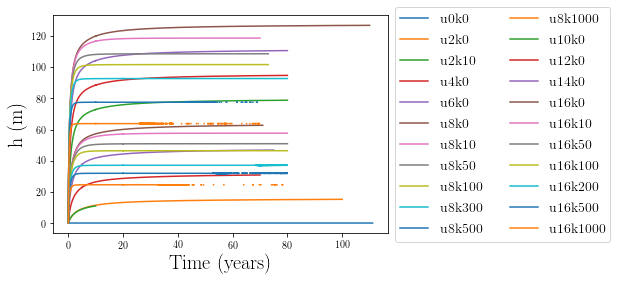

In [5]:
ds.plot(x = ds.index*100/86400/360)
plt.xlabel('Time (years)', fontsize=20)
plt.ylabel('h (m)', fontsize=20)
plt.legend(loc=6, bbox_to_anchor=(1,0.5), ncol=2)
# plt.savefig('/Users/doddridge/Desktop/uiVkappa_red_grav.pdf', bbox_inches='tight')


(0, 70)

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


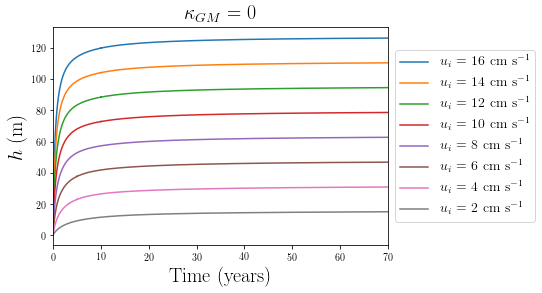

In [6]:
plt.plot(ds.index*100/86400/360, ds['u16k0'], label='$u_{i}$ = 16 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u14k0'], label='$u_{i}$ = 14 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u12k0'], label='$u_{i}$ = 12 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u10k0'], label='$u_{i}$ = 10 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u8k0'], label='$u_{i}$ = 8 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u6k0'], label='$u_{i}$ = 6 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u4k0'], label='$u_{i}$ = 4 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u2k0'], label='$u_{i}$ = 2 cm s$^{-1}$')
plt.legend(loc=6, bbox_to_anchor=(1,0.5))
plt.ylabel('$h$ (m)', fontsize=20)
plt.xlabel('Time (years)', fontsize=20)
plt.title('$\kappa_{GM} = 0$', fontsize=20)
plt.xlim(0,70)
# plt.savefig('/Users/doddridge/Desktop/kappa_gm_0.pdf', bbox_inches='tight')

(0.0, 1.05)

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


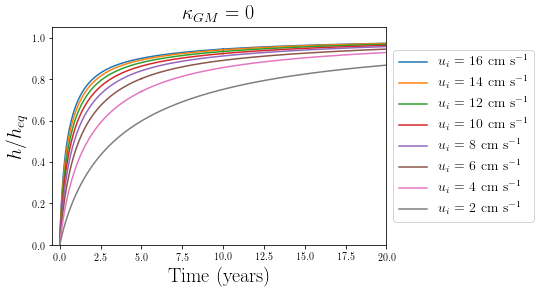

In [7]:
plt.plot(ds.index*100/86400/360, ds['u16k0']/ds['u16k0'].max(), label='$u_{i}$ = 16 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u14k0']/ds['u14k0'].max(), label='$u_{i}$ = 14 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u12k0']/ds['u12k0'].max(), label='$u_{i}$ = 12 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u10k0']/ds['u10k0'].max(), label='$u_{i}$ = 10 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u8k0']/ds['u8k0'].max(), label='$u_{i}$ = 8 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u6k0']/ds['u6k0'].max(), label='$u_{i}$ = 6 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u4k0']/ds['u4k0'].max(), label='$u_{i}$ = 4 cm s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u2k0']/ds['u2k0'].max(), label='$u_{i}$ = 2 cm s$^{-1}$')
plt.legend(loc=6, bbox_to_anchor=(1,0.5))
plt.ylabel('$h / h_{eq}$', fontsize=20)
plt.xlabel('Time (years)', fontsize=20)
plt.title('$\kappa_{GM} = 0$', fontsize=20)
plt.xlim(-0.5,20)
plt.ylim(0., 1.05)
# plt.savefig('/Users/doddridge/Desktop/kappa_gm_0_normalised.pdf', bbox_inches='tight')

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


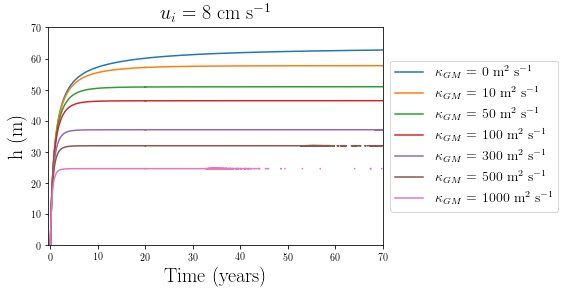

In [8]:
plt.plot(ds.index*100/86400/360, ds['u8k0'], label='$\kappa_{GM}$ = 0 m$^{2}$ s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u8k10'], label='$\kappa_{GM}$ = 10 m$^{2}$ s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u8k50'], label='$\kappa_{GM}$ = 50 m$^{2}$ s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u8k100'], label='$\kappa_{GM}$ = 100 m$^{2}$ s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u8k300'], label='$\kappa_{GM}$ = 300 m$^{2}$ s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u8k500'], label='$\kappa_{GM}$ = 500 m$^{2}$ s$^{-1}$')
plt.plot(ds.index*100/86400/360, ds['u8k1000'], label='$\kappa_{GM}$ = 1000 m$^{2}$ s$^{-1}$')
plt.legend(loc=6, bbox_to_anchor=(1,0.5))
plt.ylabel('h (m)', fontsize=20)
plt.xlabel('Time (years)', fontsize=20)
plt.title('$u_{i} = 8$ cm s$^{-1}$', fontsize=20)
plt.xlim(-0.5,70)
plt.ylim(0,70)
plt.savefig('/Users/doddridge/Desktop/uice_8.pdf', bbox_inches='tight')

In [9]:
# compare simulations with theory

f0 = 1.4e-4
R = 3.4e5
# R = 600e3

ui = 8e-2

Cd = 5.5e-3
g = 6.22e-2
K = np.array([1e-20, 10., 50., 100., 300., 500., 1000.])
t = np.linspace(0., 5e9, 1001)
t = np.tile(t, [len(K),1])
K = np.transpose(np.tile(K, [1001, 1]))

In [10]:
h_eq = (ui*f0*R/g) + ((R*f0*f0*f0)/(2.*Cd*g*g))*(K - np.sqrt(K*(K + (4.*Cd*ui*g/(f0*f0)))))

In [11]:
gamma = (K/(R*R))*np.sqrt(1 + 4.*Cd*ui*g/(K*f0*f0))

In [12]:
k1 = -h_eq*g*g*Cd/(f0*f0*R*np.sqrt(K*(K*f0*f0 + 4.*Cd*ui*g)) + h_eq*g*g*Cd)
alpha = f0*f0*R*np.sqrt(K*(K*f0*f0 + 4.*Cd*ui*g))/(g*g*Cd)

In [13]:
h_t = h_eq + alpha*k1/(np.exp(2.5*gamma*t) + k1)

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


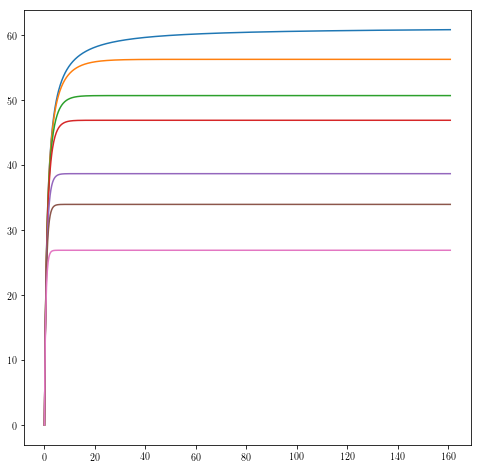

In [14]:
plt.figure(figsize=(8,8))
for n in range(7):
    plt.plot(t[0,:]/86400/360, h_t[n,:])

Text(0,0.5,'Simulated equilibrium depth')

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


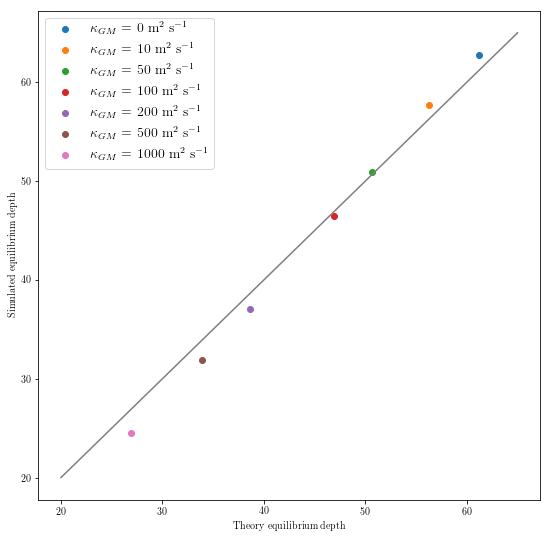

In [15]:
plt.figure(figsize=(9,9))
plt.plot(h_eq[0,0], ds['u8k0'].max(), 'o', label='$\kappa_{GM}$ = 0 m$^{2}$ s$^{-1}$')
plt.plot(h_eq[1,0], ds['u8k10'].max(), 'o', label='$\kappa_{GM}$ = 10 m$^{2}$ s$^{-1}$')
plt.plot(h_eq[2,0], ds['u8k50'].max(), 'o', label='$\kappa_{GM}$ = 50 m$^{2}$ s$^{-1}$')
plt.plot(h_eq[3,0], ds['u8k100'].max(), 'o', label='$\kappa_{GM}$ = 100 m$^{2}$ s$^{-1}$')
plt.plot(h_eq[4,0], ds['u8k300'].max(), 'o', label='$\kappa_{GM}$ = 200 m$^{2}$ s$^{-1}$')
plt.plot(h_eq[5,0], ds['u8k500'].max(), 'o', label='$\kappa_{GM}$ = 500 m$^{2}$ s$^{-1}$')
plt.plot(h_eq[6,0], ds['u8k1000'].max(), 'o', label='$\kappa_{GM}$ = 1000 m$^{2}$ s$^{-1}$')
plt.legend()
plt.plot(np.arange(20., 70., 5), np.arange(20., 70., 5))
plt.xlabel('Theory equilibrium depth')
plt.ylabel('Simulated equilibrium depth')

In [16]:
from scipy.optimize import curve_fit

In [17]:
def h_func(t, h_eq, alpha, k1, gamma):
    h = h_eq + alpha*k1/(np.exp(gamma*t) + k1)
    return h

In [18]:
# estimate params for each of the ui=8cm/s runs

h_eq_est = np.zeros(7)
alpha_est = np.zeros(7)
k1_est = np.zeros(7)
gamma_est = np.zeros(7)

for n in range(7):
    run = 'u8k{:.0f}'.format([0., 10., 50., 100., 300., 500., 1000.][n])
    hmodel = ds[run][~np.isnan(ds[run])][:10000]
    t_optim = ds.index[~np.isnan(ds[run])][:10000]*100

    popt, pcov = curve_fit(h_func, t_optim, hmodel, p0=[h_eq[n,0], alpha[n,0], k1[n,0], gamma[n,0]], maxfev=100000)
    
    h_eq_est[n] = popt[0]
    alpha_est[n] = popt[1]
    k1_est[n] = popt[2]
    gamma_est[n] = popt[3]

# plots for paper

In [19]:
h_eq_kappa_gm_0 = np.zeros(9)
for n in range(9):
    run = 'u{:.0f}k0'.format([0, 2, 4, 6, 8, 10, 12, 14, 16][n])
    h_eq_kappa_gm_0[n] = ds[run].max()

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


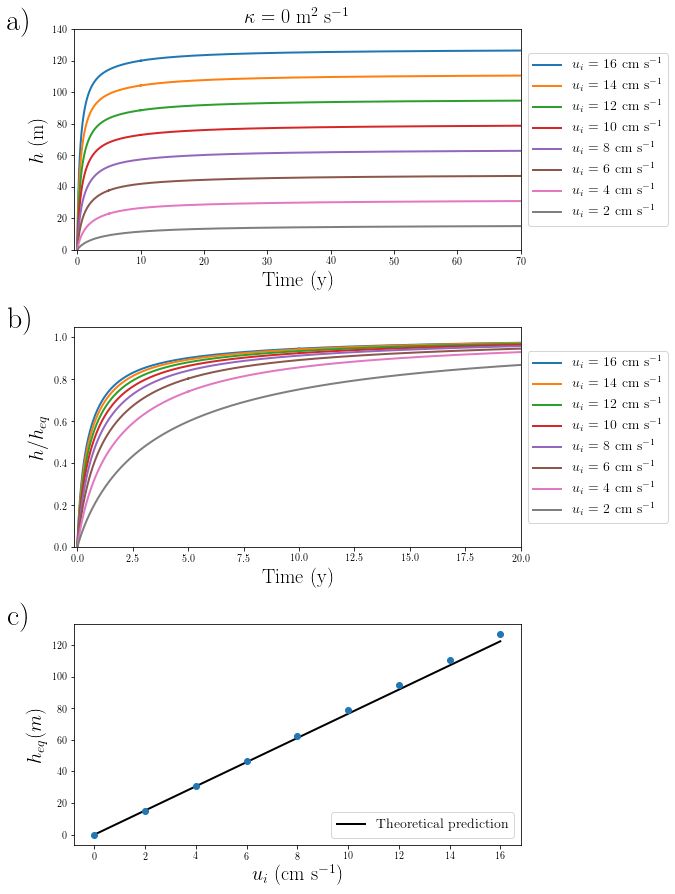

In [20]:
# kappa = 0

fig, axarr = plt.subplots(3, 1, figsize=(8,15))

fig.subplots_adjust(hspace=0.35)

# fig.suptitle('$\kappa = 0$ m$^{2}$ s$^{-1}$', fontsize=20)
axarr[0].set_title('$\kappa = 0$ m$^{2}$ s$^{-1}$', fontsize=20)

axarr[0].plot(ds.index*100/86400/360, ds['u16k0'], label='$u_{i}$ = 16 cm s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u14k0'], label='$u_{i}$ = 14 cm s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u12k0'], label='$u_{i}$ = 12 cm s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u10k0'], label='$u_{i}$ = 10 cm s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u8k0'], label='$u_{i}$ = 8 cm s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u6k0'], label='$u_{i}$ = 6 cm s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u4k0'], label='$u_{i}$ = 4 cm s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u2k0'], label='$u_{i}$ = 2 cm s$^{-1}$', linewidth=2)
axarr[0].legend(loc=6, bbox_to_anchor=(1,0.5))
axarr[0].set_ylabel('$h$ (m)', fontsize=20)
axarr[0].set_xlabel('Time (y)', fontsize=20)
# axarr[0].set_title('$\kappa_{GM} = 0$', fontsize=20)
axarr[0].set_xlim(-0.5,70)
axarr[0].set_ylim(0, 140)
axarr[0].text(-0.15,1, 'a)', fontsize=30, transform=axarr[0].transAxes)


axarr[1].plot(ds.index*100/86400/360, ds['u16k0']/ds['u16k0'].max(), label='$u_{i}$ = 16 cm s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u14k0']/ds['u14k0'].max(), label='$u_{i}$ = 14 cm s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u12k0']/ds['u12k0'].max(), label='$u_{i}$ = 12 cm s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u10k0']/ds['u10k0'].max(), label='$u_{i}$ = 10 cm s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u8k0']/ds['u8k0'].max(), label='$u_{i}$ = 8 cm s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u6k0']/ds['u6k0'].max(), label='$u_{i}$ = 6 cm s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u4k0']/ds['u4k0'].max(), label='$u_{i}$ = 4 cm s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u2k0']/ds['u2k0'].max(), label='$u_{i}$ = 2 cm s$^{-1}$', linewidth=2)
axarr[1].legend(loc=6, bbox_to_anchor=(1,0.5))
axarr[1].set_ylabel('$h / h_{eq}$', fontsize=20)
axarr[1].set_xlabel('Time (y)', fontsize=20)
# axarr[1].set_title('$\kappa_{GM} = 0$', fontsize=20)
axarr[1].set_xlim(-.142857143,20)
axarr[1].set_ylim(0., 1.05)
axarr[1].text(-0.15,1, 'b)', fontsize=30, transform=axarr[1].transAxes)

u_ice = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16])
# axarr[2].plot([0, 16*1.05], [0, h_eq_kappa_gm_0.max()*1.05], 'k')
theory, = axarr[2].plot(u_ice,
                        u_ice*f0*R/(g*100),
                        'k', label='Theoretical prediction', linewidth=2)
axarr[2].plot([0, 2, 4, 6, 8, 10, 12, 14, 16], h_eq_kappa_gm_0, 'o')
axarr[2].legend(loc=4)
axarr[2].set_ylabel('$h_{eq} (m)$', fontsize=20)
axarr[2].set_xlabel('$u_{i}$ (cm s$^{-1}$)', fontsize=20)
axarr[2].text(-0.15,1, 'c)', fontsize=30, transform=axarr[2].transAxes)

fig.savefig('/Users/doddridge/Desktop/kappa_gm_0.pdf', bbox_inches='tight')

# u_ice = 8 cm/s


In [21]:
single_sim = pd.read_csv('/Users/doddridge/Desktop/ice-ocean-governor/u8k500/spin_up/output/diagnostic.h.csv',
                         index_col=0)
single_sim.drop_duplicates(inplace=True)
ds500 = single_sim['max01            '] - single_sim['min01            ']

single_sim = pd.read_csv('/Users/doddridge/Desktop/ice-ocean-governor/u8k1000/spin_up/output/diagnostic.h.csv',
                         index_col=0)
single_sim.drop_duplicates(inplace=True)
ds1000 = single_sim['max01            '] - single_sim['min01            ']

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


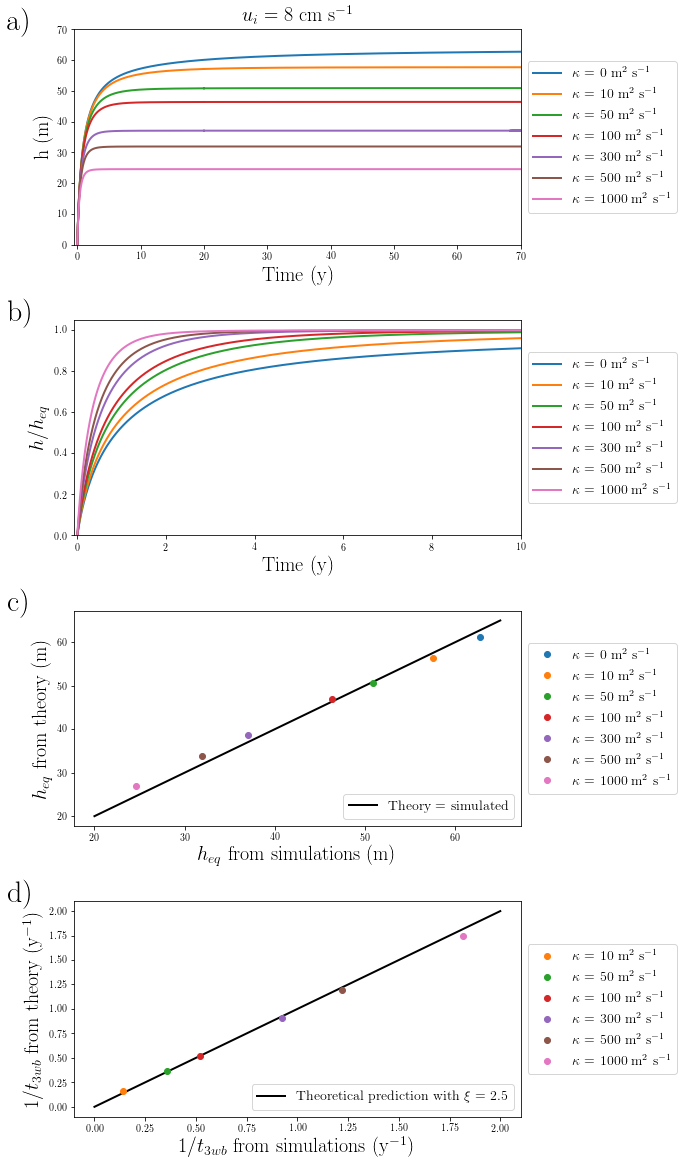

In [22]:

fig, axarr = plt.subplots(4, 1, figsize=(8,20))

fig.subplots_adjust(hspace=0.35)

# fig.suptitle('$u_{i} = 16$ cm s$^{-1}$', fontsize=20)
axarr[0].set_title('$u_{i} = 8$ cm s$^{-1}$', fontsize=20)


axarr[0].plot(ds.index*100/86400/360, ds['u8k0'], label='$\kappa$ = 0 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u8k10'], label='$\kappa$ = 10 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u8k50'], label='$\kappa$ = 50 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u8k100'], label='$\kappa$ = 100 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[0].plot(ds.index*100/86400/360, ds['u8k300'], label='$\kappa$ = 300 m$^{2}$ s$^{-1}$', linewidth=2)
# axarr[0].plot(ds.index*100/86400/360, ds['u8k500'], label='$\kappa$ = 500 m$^{2}$ s$^{-1}$', linewidth=2)
# axarr[0].plot(ds.index*100/86400/360, ds['u8k1000'], label='$\kappa$ = 1000 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[0].plot(ds500.index*100/86400/360, ds500, label='$\kappa$ = 500 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[0].plot(ds1000.index*100/86400/360, ds1000, label='$\kappa$ = 1000 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[0].legend(loc=6, bbox_to_anchor=(1,0.5))
axarr[0].set_ylabel('h (m)', fontsize=20)
axarr[0].set_xlabel('Time (y)', fontsize=20)
axarr[0].set_xlim(-0.5,70)
axarr[0].set_ylim(0, 70)
axarr[0].text(-0.15,1, 'a)', fontsize=30, transform=axarr[0].transAxes)


axarr[1].plot(ds.index*100/86400/360, ds['u8k0']/ds['u8k0'].max(),
              label='$\kappa$ = 0 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u8k10']/ds['u8k10'].max(),
              label='$\kappa$ = 10 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u8k50']/ds['u8k50'].max(),
              label='$\kappa$ = 50 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u8k100']/ds['u8k100'].max(),
              label='$\kappa$ = 100 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u8k300']/ds['u8k300'].max(),
              label='$\kappa$ = 300 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u8k500']/ds['u8k500'].max(),
              label='$\kappa$ = 500 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[1].plot(ds.index*100/86400/360, ds['u8k1000']/ds['u8k1000'].max(),
              label='$\kappa$ = 1000 m$^{2}$ s$^{-1}$', linewidth=2)
axarr[1].legend(loc=6, bbox_to_anchor=(1,0.5))
axarr[1].set_ylabel('$h/h_{eq}$', fontsize=20)
axarr[1].set_xlabel('Time (y)', fontsize=20)
axarr[1].set_xlim(-.071428571,10)
axarr[1].set_ylim(0., 1.05)
axarr[1].text(-0.15,1, 'b)', fontsize=30, transform=axarr[1].transAxes)


axarr[2].plot(ds['u8k0'].max(), #h_eq_est[0],
              h_eq[0,0], 'o', label='$\kappa$ = 0 m$^{2}$ s$^{-1}$')
axarr[2].plot(h_eq_est[1], h_eq[1,0], 'o', label='$\kappa$ = 10 m$^{2}$ s$^{-1}$')
axarr[2].plot(h_eq_est[2], h_eq[2,0], 'o', label='$\kappa$ = 50 m$^{2}$ s$^{-1}$')
axarr[2].plot(h_eq_est[3], h_eq[3,0], 'o', label='$\kappa$ = 100 m$^{2}$ s$^{-1}$')
axarr[2].plot(h_eq_est[4], h_eq[4,0], 'o', label='$\kappa$ = 300 m$^{2}$ s$^{-1}$')
axarr[2].plot(h_eq_est[5], h_eq[5,0], 'o', label='$\kappa$ = 500 m$^{2}$ s$^{-1}$')
axarr[2].plot(h_eq_est[6], h_eq[6,0], 'o', label='$\kappa$ = 1000 m$^{2}$ s$^{-1}$')
first_legendc = axarr[2].legend(loc=6, bbox_to_anchor=(1,0.5))
ax = axarr[2].add_artist(first_legendc)

one2one, = axarr[2].plot(np.arange(20, 70, 5), np.arange(20, 70, 5), 'k',
                         label='Theory = simulated', zorder=0, linewidth=2)
axarr[2].legend(handles=[one2one], loc=4)

axarr[2].text(-0.15,1, 'c)', fontsize=30, transform=axarr[2].transAxes)
axarr[2].set_xlabel('$h_{eq}$ from simulations (m)', fontsize=20)
axarr[2].set_ylabel('$h_{eq}$ from theory (m)', fontsize=20)


s_per_y = 86400*365
xi = 2.5
axarr[3].plot(gamma_est[0]*s_per_y, gamma[0,0]*s_per_y*xi, 'o', alpha=0)# label='$\kappa$ = 0 m$^{2}$ s$^{-1}$')
axarr[3].plot(gamma_est[1]*s_per_y, gamma[1,0]*s_per_y*xi, 'o', label='$\kappa$ = 10 m$^{2}$ s$^{-1}$')
axarr[3].plot(gamma_est[2]*s_per_y, gamma[2,0]*s_per_y*xi, 'o', label='$\kappa$ = 50 m$^{2}$ s$^{-1}$')
axarr[3].plot(gamma_est[3]*s_per_y, gamma[3,0]*s_per_y*xi, 'o', label='$\kappa$ = 100 m$^{2}$ s$^{-1}$')
axarr[3].plot(gamma_est[4]*s_per_y, gamma[4,0]*s_per_y*xi, 'o', label='$\kappa$ = 300 m$^{2}$ s$^{-1}$')
axarr[3].plot(gamma_est[5]*s_per_y, gamma[5,0]*s_per_y*xi, 'o', label='$\kappa$ = 500 m$^{2}$ s$^{-1}$')
axarr[3].plot(gamma_est[6]*s_per_y, gamma[6,0]*s_per_y*xi, 'o', label='$\kappa$ = 1000 m$^{2}$ s$^{-1}$')
first_legendd = axarr[3].legend(loc=6, bbox_to_anchor=(1,0.5))
# Add the legend manually to the current Axes.
ax = axarr[3].add_artist(first_legendd)

theory_scaled, = axarr[3].plot(np.linspace(0, 2, 20), np.linspace(0, 2, 20), 'k',
                               label=r'Theoretical prediction with $\xi$ = {0}'.format(xi), linewidth=2, zorder=0)
axarr[3].legend(handles=[theory_scaled], loc=4)
# axarr[3].set_xlim(-2e-9, 8e-8)
# axarr[3].set_ylim(-2e-9, 8e-8)
axarr[3].set_xlabel('$1/t_{3wb}$ from simulations (y$^{-1}$)', fontsize=20)
axarr[3].set_ylabel('$1/t_{3wb}$ from theory (y$^{-1}$)', fontsize=20)
axarr[3].text(-0.15,1, 'd)', fontsize=30, transform=axarr[3].transAxes)

# axarr[3].plot(0, gamma_est[0]*s_per_y, 'o', label='$\kappa$ = 0 m$^{2}$ s$^{-1}$')
# axarr[3].plot(10, gamma_est[1]*s_per_y, 'o', label='$\kappa$ = 10 m$^{2}$ s$^{-1}$')
# axarr[3].plot(50, gamma_est[2]*s_per_y, 'o', label='$\kappa$ = 50 m$^{2}$ s$^{-1}$')
# axarr[3].plot(100, gamma_est[3]*s_per_y, 'o', label='$\kappa$ = 100 m$^{2}$ s$^{-1}$')
# axarr[3].plot(500, gamma_est[4]*s_per_y, 'o', label='$\kappa$ = 500 m$^{2}$ s$^{-1}$')
# axarr[3].plot(1000, gamma_est[5]*s_per_y, 'o', label='$\kappa$ = 1000 m$^{2}$ s$^{-1}$')
# first_legendd = axarr[3].legend(loc=6, bbox_to_anchor=(1,0.5))
# # Add the legend manually to the current Axes.
# ax = axarr[3].add_artist(first_legendd)

# kappa_plot = np.linspace(0.0001, 1000, 5000)
# tgov_theory = 2.4*s_per_y*kappa_plot*np.sqrt(4.*Cd*ui*g/(kappa_plot*f0**2))/(R**2)

# theory_scaled, = axarr[3].plot(kappa_plot, tgov_theory, 'k',
#                                label=r'Theoretical prediction with $\xi$ = 2.4')
# axarr[3].legend(handles=[theory_scaled], loc=4)
# # axarr[3].set_xlim(-2e-9, 8e-8)
# # axarr[3].set_ylim(-2e-9, 8e-8)
# axarr[3].set_xlabel('$\kappa$ (m$^{2}$/s)', fontsize=20)
# axarr[3].set_ylabel('$1/t_{gov}$ (1/years)', fontsize=20)
# axarr[3].text(-0.15,1, 'd)', fontsize=30, transform=axarr[3].transAxes)

fig.savefig('/Users/doddridge/Desktop/uice_8.pdf', bbox_inches='tight')